<a href="https://colab.research.google.com/github/Surya-Abhinai/Human-Activity-Recognition/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'human-activity-recognition-with-smartphones:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F226%2F793070%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240207%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240207T150443Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D46315db673bcfe1f77305d977a0bde9fe8e69eaa0c5279c25d106998fc86db27e8c8b5bbfb28d54e2a4b6f12848c00e6fe4173687e85c4b5d0f82d36217fd51b583c1d4ec7649b9b6f553b5d9ab7e82570acc59709489b13eb350b0e088dbc225a4711837e3546aee563e4bfb2b42712991dedebf69a111fb8b4e6090dc65ce3159475b0f07393290412ecb4f5568d2647c094a46888858058d233fa3ba3665da9d37090fccaa6970deb505750dc7c2ec553d81fa6a23a3e4da6052f7b48bf24d90a93f6b1a5e4857f8805d470b210e595e627c37f3283fc122a9efa3a7228aa6a332050c3b587fbaa5fdefccf017b65ce543ec075506d7ba0ae613fb1181758'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 25693584 bytes downloaded
Downloaded and uncompressed: human-activity-recognition-with-smartphones
Data source import complete.


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [6]:
len(df)

7352

In [7]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [8]:
for i in df.columns :
    print(i)

tBodyAcc-mean()-X
tBodyAcc-mean()-Y
tBodyAcc-mean()-Z
tBodyAcc-std()-X
tBodyAcc-std()-Y
tBodyAcc-std()-Z
tBodyAcc-mad()-X
tBodyAcc-mad()-Y
tBodyAcc-mad()-Z
tBodyAcc-max()-X
tBodyAcc-max()-Y
tBodyAcc-max()-Z
tBodyAcc-min()-X
tBodyAcc-min()-Y
tBodyAcc-min()-Z
tBodyAcc-sma()
tBodyAcc-energy()-X
tBodyAcc-energy()-Y
tBodyAcc-energy()-Z
tBodyAcc-iqr()-X
tBodyAcc-iqr()-Y
tBodyAcc-iqr()-Z
tBodyAcc-entropy()-X
tBodyAcc-entropy()-Y
tBodyAcc-entropy()-Z
tBodyAcc-arCoeff()-X,1
tBodyAcc-arCoeff()-X,2
tBodyAcc-arCoeff()-X,3
tBodyAcc-arCoeff()-X,4
tBodyAcc-arCoeff()-Y,1
tBodyAcc-arCoeff()-Y,2
tBodyAcc-arCoeff()-Y,3
tBodyAcc-arCoeff()-Y,4
tBodyAcc-arCoeff()-Z,1
tBodyAcc-arCoeff()-Z,2
tBodyAcc-arCoeff()-Z,3
tBodyAcc-arCoeff()-Z,4
tBodyAcc-correlation()-X,Y
tBodyAcc-correlation()-X,Z
tBodyAcc-correlation()-Y,Z
tGravityAcc-mean()-X
tGravityAcc-mean()-Y
tGravityAcc-mean()-Z
tGravityAcc-std()-X
tGravityAcc-std()-Y
tGravityAcc-std()-Z
tGravityAcc-mad()-X
tGravityAcc-mad()-Y
tGravityAcc-mad()-Z
tGravityAcc-m

In [9]:
print(len(df.columns))

563


IndexError: index 12 is out of bounds for axis 0 with size 12

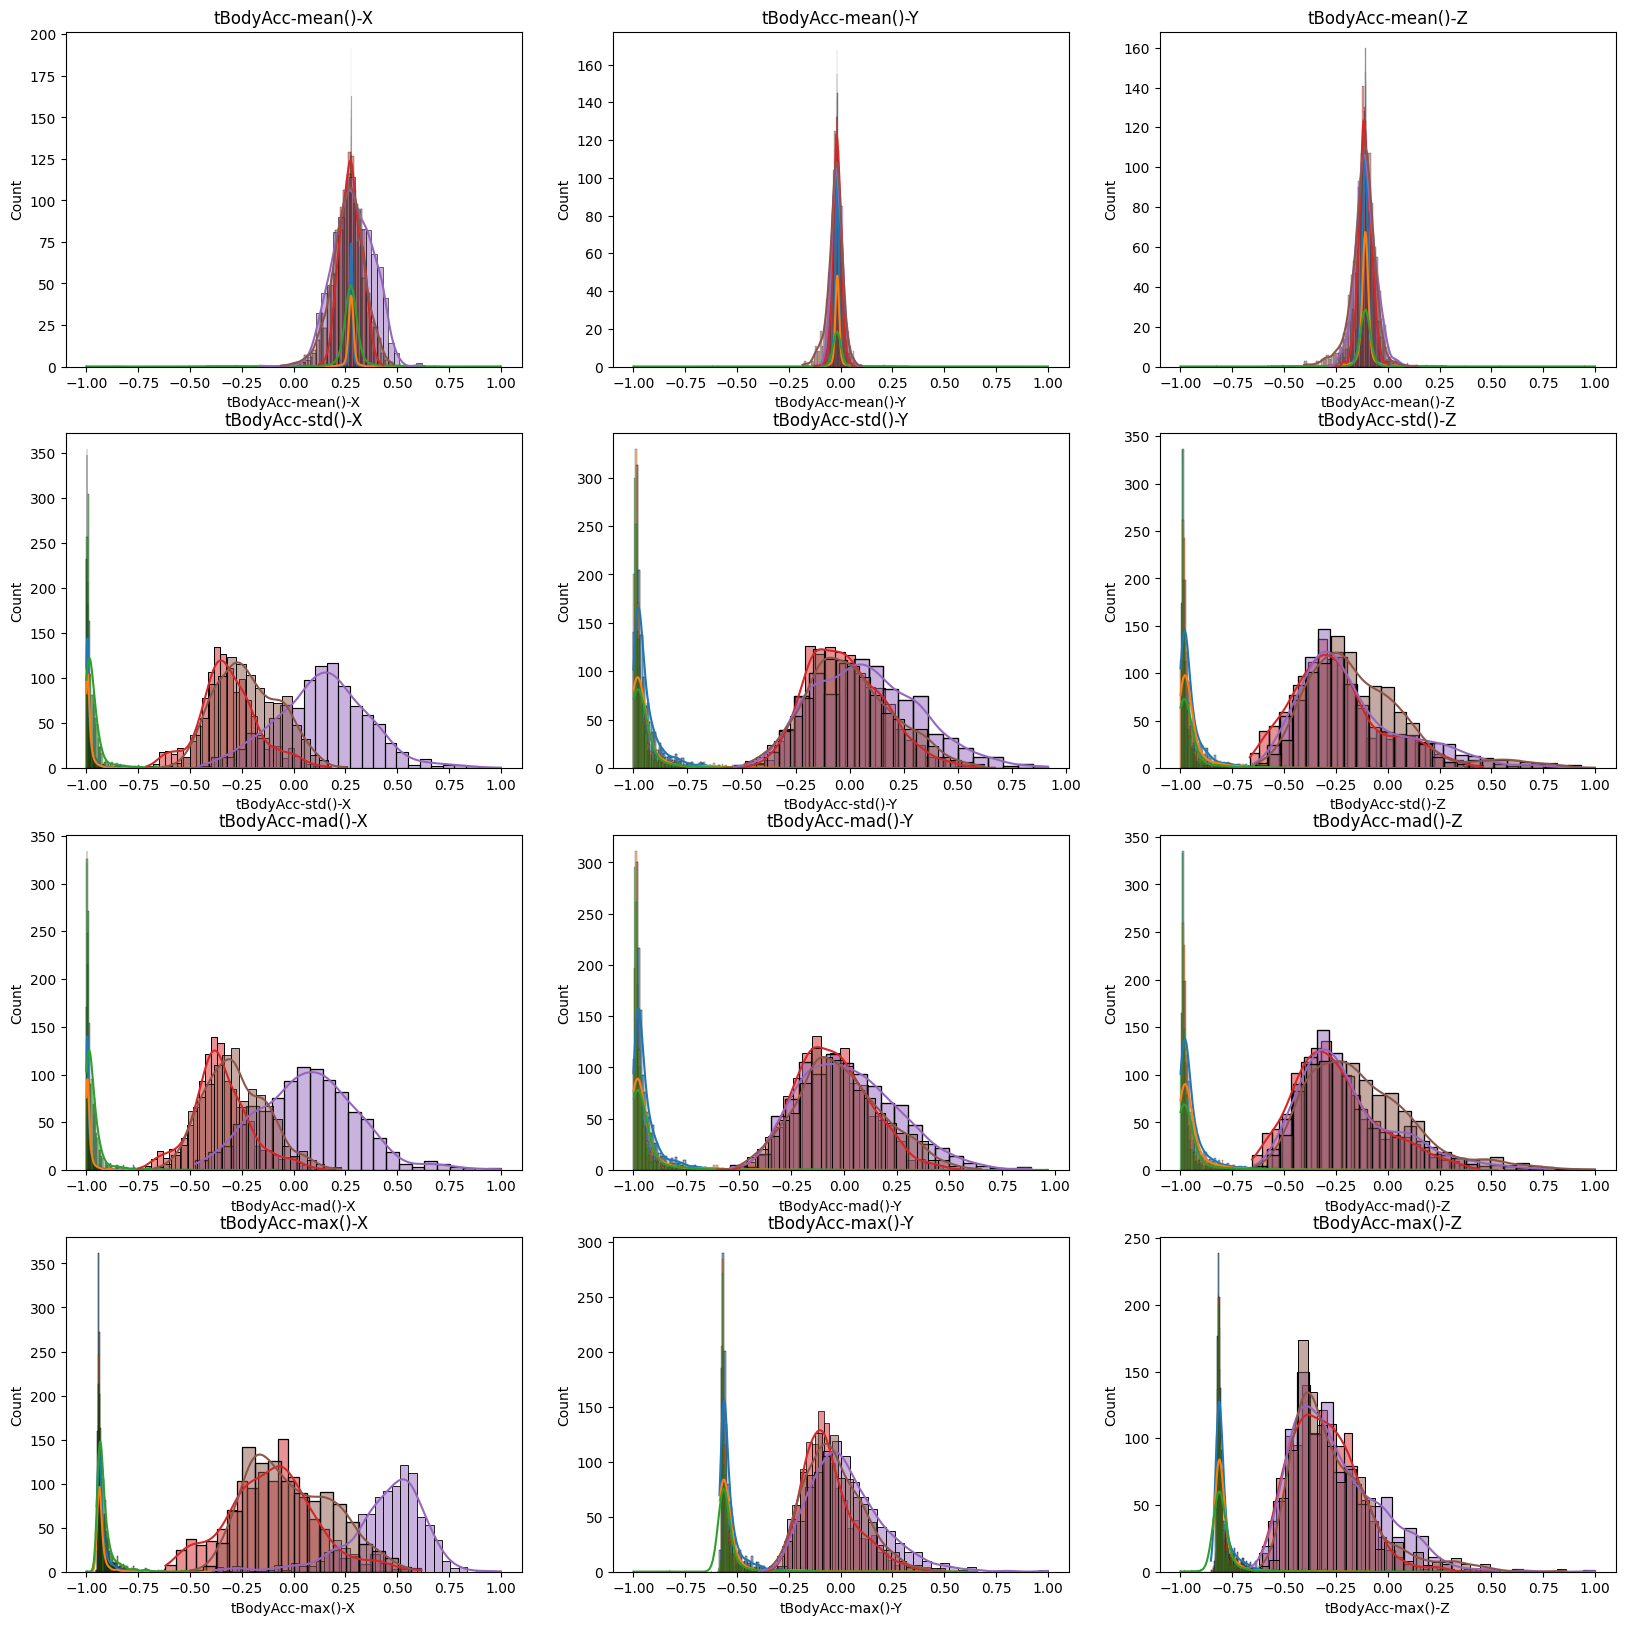

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


num_features = 12

num_classes = len(df['Activity'].unique())

num_rows = 4
num_cols = num_features // num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

axes = axes.flatten()

for i, feature in enumerate(df.columns[:-550]):
    for class_label in df['Activity'].unique():
        data = df[df['Activity'] == class_label][feature]

        sns.histplot(data, kde=True, label=f'Class {class_label}', ax=axes[i])

    axes[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [12]:
df_test = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/test.csv')

In [13]:
X_train =df.iloc[:,:-1]
y_train =df.iloc[:,-1]
X_test =df_test.iloc[:,:-1]
y_test =df_test.iloc[:,-1]

In [14]:
SC=StandardScaler()
X_train_Scaled=SC.fit_transform(X_train)
X_test_Scaled=SC.fit_transform(X_test)

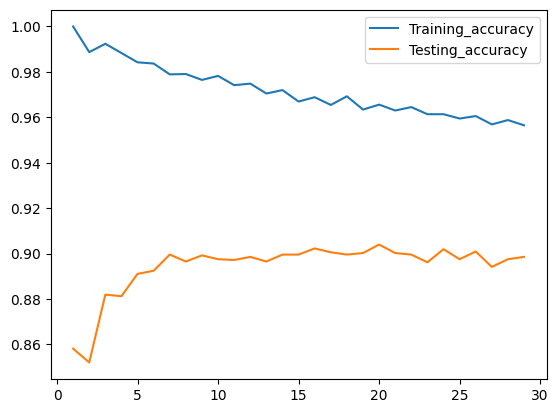

In [15]:
train_accuracy=[]
test_accuracy=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_Scaled,y_train)
  train_accuracy.append(knn.score(X_train_Scaled,y_train))
  test_accuracy.append(knn.score(X_test_Scaled,y_test))

x=[i for i in range(1,30)]
plt.plot(x,train_accuracy,label='Training_accuracy')
plt.plot(x,test_accuracy,label='Testing_accuracy')
plt.legend()
plt.plot();

In [16]:
classifier=KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train_Scaled,y_train)
classifier.score(X_test_Scaled,y_test)

0.8819138106549033

In [17]:
X_train.shape

(7352, 562)

In [18]:
y_train.shape

(7352,)

In [19]:
y_train

0               STANDING
1               STANDING
2               STANDING
3               STANDING
4               STANDING
              ...       
7347    WALKING_UPSTAIRS
7348    WALKING_UPSTAIRS
7349    WALKING_UPSTAIRS
7350    WALKING_UPSTAIRS
7351    WALKING_UPSTAIRS
Name: Activity, Length: 7352, dtype: object

In [20]:
y_train.replace({'STANDING': 0, 'SITTING' : 1, 'LAYING' : 2, 'WALKING' : 3, 'WALKING_DOWNSTAIRS' : 4,
       'WALKING_UPSTAIRS' : 5}, inplace=True)

In [21]:
y_test.replace({'STANDING': 0, 'SITTING' : 1, 'LAYING' : 2, 'WALKING' : 3, 'WALKING_DOWNSTAIRS' : 4,
       'WALKING_UPSTAIRS' : 5}, inplace=True)

In [22]:
X_train = X_train.values
y_train = y_train.values

In [23]:
from tensorflow.keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train, num_classes=num_classes)

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

num_classes = 6

X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

model = Sequential()

model.add(LSTM(128, input_shape=(1, 562), return_sequences=True))

model.add(LSTM(64))

model.add(Dense(32, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train_reshaped, y_train_one_hot, epochs=10, batch_size=32)

Epoch 1/10
230/230 [==============================] - 6s 6ms/step - loss: 0.5358 - accuracy: 0.7928
Epoch 2/10
230/230 [==============================] - 1s 6ms/step - loss: 0.1378 - accuracy: 0.9455
Epoch 3/10
230/230 [==============================] - 2s 7ms/step - loss: 0.0886 - accuracy: 0.9656
Epoch 4/10
230/230 [==============================] - 2s 10ms/step - loss: 0.0796 - accuracy: 0.9686
Epoch 5/10
230/230 [==============================] - 1s 6ms/step - loss: 0.0680 - accuracy: 0.9732
Epoch 6/10
230/230 [==============================] - 1s 6ms/step - loss: 0.0735 - accuracy: 0.9709
Epoch 7/10
230/230 [==============================] - 1s 6ms/step - loss: 0.0677 - accuracy: 0.9759
Epoch 8/10
230/230 [==============================] - 1s 6ms/step - loss: 0.0591 - accuracy: 0.9773
Epoch 9/10
230/230 [==============================] - 1s 6ms/step - loss: 0.0578 - accuracy: 0.9773
Epoch 10/10
230/230 [==============================] - 1s 6ms/step - loss: 0.0471 - accuracy: 0.980

In [25]:
X_test = X_test.values
y_test = y_test.values

In [26]:
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [27]:
y_predict = model.predict(X_test_reshaped)

93/93 [==============================] - 1s 3ms/step


In [28]:
y_pred = np.argmax(y_predict, axis=1)

In [29]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 93.42%
